In [1]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

2022-12-18 23:46:21.902132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 23:46:26.415012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 23:46:26.415086: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 23:46:38.989704: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

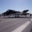

In [2]:
img=Image.open("/home/student/Desktop/PYTHON/G18/Image/cifar10/train/airplane/10010_airplane.png")
img

In [3]:
img.size

(32, 32)

In [4]:
data=tf.keras.utils.image_dataset_from_directory("/home/student/Desktop/PYTHON/G18/Image/cifar10/train",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=5000)

                                            

Found 50000 files belonging to 10 classes.


2022-12-18 23:46:55.086610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-18 23:46:55.094106: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-18 23:46:55.094256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dharanibhaskar): /proc/driver/nvidia/version does not exist
2022-12-18 23:46:55.220061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
for fe,la in data:
    print(fe.shape,la.shape)
    break

2022-12-18 23:47:12.809329: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1044 of 40000
2022-12-18 23:47:22.817062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2061 of 40000
2022-12-18 23:47:32.811611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2947 of 40000
2022-12-18 23:47:42.803959: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3655 of 40000
2022-12-18 23:47:52.803415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4380 of 40000
2022-12-18 23:48:02.804576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 5138 of 40000
2022-12-18 23:48:12.919275: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling 

(5000, 32, 32, 3) (5000,)


2022-12-18 23:55:24.638266: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 61440000 exceeds 10% of free system memory.


In [6]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(10),
    layers.Softmax()
])

In [7]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0

In [8]:
cnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [9]:
for images,labels in data:
    features=tf.divide(fe,255)
    labels=tf.one_hot(la,10)
    record=cnn_model.fit(features,labels,batch_size=10,epochs=100)
    break

2022-12-18 23:55:53.333100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 500 of 40000
2022-12-18 23:56:03.316940: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1493 of 40000
2022-12-18 23:56:13.314970: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2474 of 40000
2022-12-18 23:56:23.313346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3375 of 40000
2022-12-18 23:56:33.323231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4162 of 40000
2022-12-18 23:56:43.320524: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4925 of 40000
2022-12-18 23:56:53.325677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling u

Epoch 1/100


2022-12-19 00:05:44.023159: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 61440000 exceeds 10% of free system memory.


500/500 [==============================] - 27s 11ms/step - loss: 1.9788 - accuracy: 0.2536
Epoch 2/100
500/500 [==============================] - 6s 12ms/step - loss: 1.6271 - accuracy: 0.4024
Epoch 3/100
500/500 [==============================] - 5s 11ms/step - loss: 1.4805 - accuracy: 0.4608
Epoch 4/100
500/500 [==============================] - 6s 12ms/step - loss: 1.3746 - accuracy: 0.5076
Epoch 5/100
500/500 [==============================] - 6s 11ms/step - loss: 1.2843 - accuracy: 0.5370
Epoch 6/100
500/500 [==============================] - 6s 11ms/step - loss: 1.2053 - accuracy: 0.5690
Epoch 7/100
500/500 [==============================] - 7s 14ms/step - loss: 1.1511 - accuracy: 0.5844
Epoch 8/100
500/500 [==============================] - 8s 16ms/step - loss: 1.0950 - accuracy: 0.6092
Epoch 9/100
500/500 [==============================] - 9s 18ms/step - loss: 1.0421 - accuracy: 0.6276
Epoch 10/100
500/500 [==============================] - 7s 15ms/step - loss: 1.0084 - accurac

500/500 [==============================] - 5s 11ms/step - loss: 0.1312 - accuracy: 0.9554
Epoch 81/100
500/500 [==============================] - 6s 12ms/step - loss: 0.1182 - accuracy: 0.9582
Epoch 82/100
500/500 [==============================] - 5s 11ms/step - loss: 0.2096 - accuracy: 0.9292
Epoch 83/100
500/500 [==============================] - 6s 13ms/step - loss: 0.1630 - accuracy: 0.9438
Epoch 84/100
500/500 [==============================] - 7s 14ms/step - loss: 0.2037 - accuracy: 0.9364
Epoch 85/100
500/500 [==============================] - 7s 14ms/step - loss: 0.0658 - accuracy: 0.9772
Epoch 86/100
500/500 [==============================] - 7s 14ms/step - loss: 0.0760 - accuracy: 0.9750
Epoch 87/100
500/500 [==============================] - 7s 13ms/step - loss: 0.2048 - accuracy: 0.9320
Epoch 88/100
500/500 [==============================] - 9s 18ms/step - loss: 0.1890 - accuracy: 0.9372
Epoch 89/100
500/500 [==============================] - 7s 14ms/step - loss: 0.1643 - 

In [10]:
model=cnn_model.save("image_classification.h5",save_format="h5")

In [11]:
model


In [12]:
model1=tf.keras.models.load_model("image_classification.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0